<a href="https://colab.research.google.com/github/Manoj-Kumar-Paliviri/Major-Project/blob/main/ML_Major_Project_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Gathering and loading

In [1]:
import numpy as np 
import pandas as pd
import sklearn
df = pd.read_table('/content/drive/MyDrive/PYTHON-APRIL/Machine Learning/Data Sets/amazon_alexa.tsv')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [2]:
df['rating'].value_counts()

5    2286
4     455
1     161
3     152
2      96
Name: rating, dtype: int64

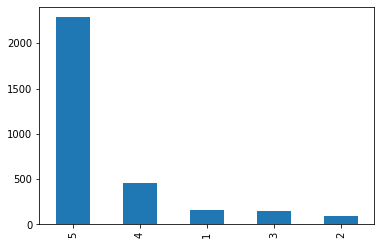

In [3]:
df.rating.value_counts().plot(kind = 'bar')

In [4]:
df.shape

(3150, 5)

#Preprocessing

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
nltk.download('all') 

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [7]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
len(stop_words)

179

In [9]:
negative_words=['no','not',"don't","aren't","couldn't","didn't","doesn't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","shouldn't","wasn't","weren't","won't","wouldn't"]
for word in negative_words:
  stop_words.remove(word)
len(stop_words)

160

Cleaning the data by removing numbers,punctuation and white spaces using 're'(regular expression) module

In [10]:
import re
replace_white_space_re = re.compile('[/(){}—[]|@,;‘?|।!-॥–’-]')

def clean_text(data):
  data = str(data).lower()
  data = data.replace("<br /><br />", "")
  data = replace_white_space_re.sub(' ', data)
  data = re.sub("[^a-z]+", " ", data)
  data = re.sub("[0-9]", " ",data)
  data = data.split(" ")
  data = [word for word in data if word not in stop_words ]
  data = " ".join(data)
  return data

In [39]:
df['verified_reviews'] = df['verified_reviews'].apply(clean_text)
ratings = [
           (df['rating']<3),
           (df['rating']==3),
           (df['rating']>=4),
          ]
analysis = ['Negative','Neutral','Positive']
df['sentiment'] = np.select(ratings,analysis)
df[['rating','verified_reviews','sentiment']].head(10)

,rating,verified_reviews,sentiment
0,5,love echo,Positive
1,5,loved,Positive
2,4,sometimes playing game answer question correct...,Positive
3,5,lot fun thing yr old learns dinosaurs control ...,Positive
4,5,music,Positive
5,5,received echo gift needed another bluetooth so...,Positive
6,3,without cellphone cannot use many features ipa...,Neutral
7,5,think th one purchased working getting one eve...,Positive
8,5,looks great,Positive
9,5,love listened songs heard since childhood get ...,Positive


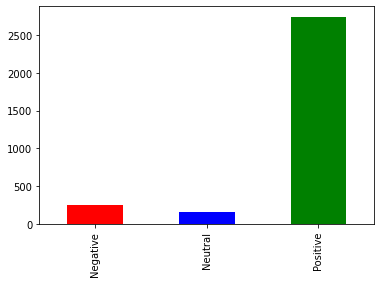

In [40]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().sort_index().plot.bar(color = ['r','b','g'])

Stemming

In [41]:
from nltk import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()
cleansed_review = []
for text in df['verified_reviews']:
  cleansed_text = []
  text = text.replace('<br /><br />',' ')
  text = re.sub('[^a-zA-Z]',' ',text)
  text = text.lower()
  for word in nltk.word_tokenize(text):
    if word not in stopwords.words('english'):
      cleansed_text.append(ps.stem(word))
  cleansed_text = ' '.join(word for word in cleansed_text)
  cleansed_review.append(cleansed_text)

In [42]:
cleansed_review[6]

'without cellphon use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet'

Setting the input and output

In [43]:
x = np.array(cleansed_review)
y = df['sentiment'].values
print(x,y,sep = '\n')

['love echo' 'love'
 'sometim play game answer question correctli alexa say got wrong answer like abl turn light away home'
 ...
 'love thing run entir home tv light thermostat front door dead bolt camera love listen npr thing well worth valu realli shine stat ad smart devic control entir home like right star trek name mine comput get feel amaz devic smart system'
 'complaint sound qualiti great mostli use command though anoth dot hook stereo system play music coupl friend dot mind audio qualiti bother kind thing go full size echo make sure hook larger speaker'
 'good']
['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']


Splitting the data to test and train the model

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [45]:
print(x_train.shape)
print(y_test.shape)

(2362,)
(788,)


In [46]:
import numpy as np
np.unique(y_train,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([ 186,  106, 2070]))

In [47]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
from sklearn.pipeline import Pipeline
text_model = Pipeline([('vect1',TfidfVectorizer()),('model1',SVC())])
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vect1',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model1',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', 

In [49]:
vect = TfidfVectorizer()
x_train = vect.fit_transform(x_train)
x_test = vect.transform(x_test)

In [50]:
x_train

<2362x2531 sparse matrix of type '<class 'numpy.float64'>'
	with 26472 stored elements in Compressed Sparse Row format>

In [51]:
x_test

<788x2531 sparse matrix of type '<class 'numpy.float64'>'
	with 8491 stored elements in Compressed Sparse Row format>

In [52]:
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array(['Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positi

In [53]:
y_test

array(['Positive', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Negative', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Neutral', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Neutral', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Positive', 'Positive',
       'Positive', 'Positive', 'Negative', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Negative', 'Neutral',
       'Neutral', 'Positive', 'Positive', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Positive', 'Negative',
       'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
   

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)

0.8756345177664975

In [55]:
confusion_matrix(y_pred,y_test)

array([[ 14,   0,   0],
       [  0,   5,   0],
       [ 57,  41, 671]])

In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.20      1.00      0.33        14
     Neutral       0.11      1.00      0.20         5
    Positive       1.00      0.87      0.93       769

    accuracy                           0.88       788
   macro avg       0.44      0.96      0.49       788
weighted avg       0.98      0.88      0.92       788



Evaluation for a specific message

In [57]:
text = cleansed_review[6]
text

'without cellphon use mani featur ipad see use great alarm u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons seem smartbon polit yet'

In [58]:
df['sentiment'][6]

'Neutral'

In [59]:
text = vect.transform([text])
model.predict(text)

array(['Neutral'], dtype=object)

Saving the model

In [60]:
import joblib
joblib.dump(text_model,'Sentiment_Analyzer')

['Sentiment_Analyzer']

In [33]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 439kB/s 
     |████████████████████████████████| 81kB 9.2MB/s 
     |████████████████████████████████| 112kB 35.2MB/s 
     |████████████████████████████████| 4.2MB 36.3MB/s 
     |████████████████████████████████| 174kB 41.9MB/s 
     |████████████████████████████████| 122kB 38.6MB/s 
     |████████████████████████████████| 71kB 8.4MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.5 which is incompatible.


In [61]:
%%writefile app.py
import streamlit as st
import joblib
model = joblib.load('Sentiment_Analyzer')
st.title('Sentiment Analyzer')
input = st.text_input('Enter your review:')
output = model.predict([input])
ans = output[0]
if st.button('Predict'):
  st.title(output[0])

Overwriting app.py


In [35]:
!nohup streamlit run app.py &
url = ngrok.connect(port = '8501')
url

nohup: appending output to 'nohup.out'


'http://95935f86a2fa.ngrok.io'

In [37]:
sklearn. __version__ 

'0.22.2.post1'